In [47]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#plt.rc('font', size=18)
#plt.rcParams['figure.constrained_layout.use'] = False
import sys
import scipy.stats as stats

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
print(tf.__version__)

2.1.0


In [49]:
df = pd.read_csv('acc_data (right_wrist).csv')
X = np.column_stack((np.array(df['Acc_X']), np.array(df['Acc_Y']), np.array(df['Acc_Z'])))
y = np.array(df['PacketCounter']).reshape(-1, 1)

In [50]:
columns =['PacketCounter', 'Acc_X', 'Acc_Y', 'Acc_Z']
data = pd.DataFrame(data = df, columns = columns)
data.head()

,PacketCounter,Acc_X,Acc_Y,Acc_Z
0,0,0.000000,0.000000,0.000000
1,1,-8.874124,-0.679627,2.768368
2,2,-8.873473,-0.613973,2.761706
3,3,-8.834931,-0.518206,2.797576
4,4,-8.921975,-0.508252,2.836315


In [51]:
data['Acc_X'] = data['Acc_X'].astype('float')
data['Acc_Y'] = data['Acc_Y'].astype('float')
data['Acc_Z'] = data['Acc_Z'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PacketCounter  403 non-null    int64  
 1   Acc_X          403 non-null    float64
 2   Acc_Y          403 non-null    float64
 3   Acc_Z          403 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.7 KB


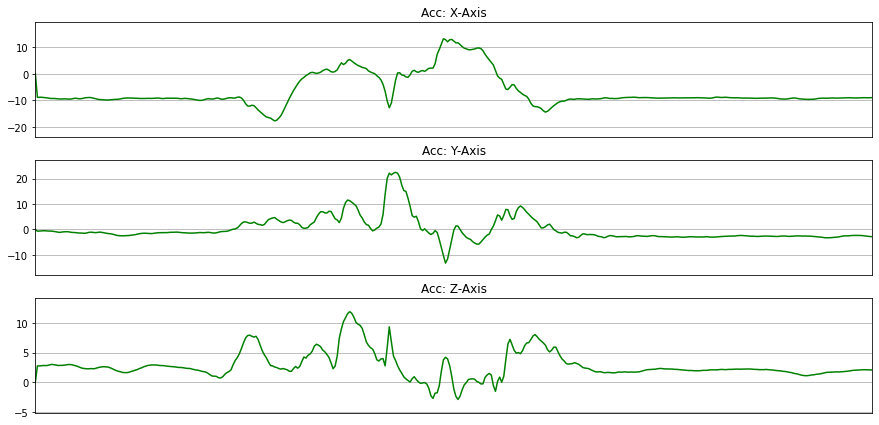

In [52]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
plot_axis(ax0, data['PacketCounter'], data['Acc_X'], 'Acc: X-Axis')
plot_axis(ax1, data['PacketCounter'], data['Acc_Y'], 'Acc: Y-Axis')
plot_axis(ax2, data['PacketCounter'], data['Acc_Z'], 'Acc: Z-Axis')
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(top=0.90)
plt.show()

In [53]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['PacketCounter'])
data.head()

,PacketCounter,Acc_X,Acc_Y,Acc_Z,label
0,0,0.000000,0.000000,0.000000,0
1,1,-8.874124,-0.679627,2.768368,1
2,2,-8.873473,-0.613973,2.761706,2
3,3,-8.834931,-0.518206,2.797576,3
4,4,-8.921975,-0.508252,2.836315,4


In [54]:
label.classes_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [60]:
X = data[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = data['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_X['label'] = y.values

scaled_X.head()

,Acc_X,Acc_Y,Acc_Z,label
0,1.065724,-0.010709,-1.222835,0
1,-0.378791,-0.153964,-0.015481,1
2,-0.378685,-0.140125,-0.018386,2
3,-0.372411,-0.119939,-0.002742,3
4,-0.386580,-0.117841,0.014152,4


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
X_train.shape, X_test.shape

((322, 3), (81, 3))

In [63]:
X_train[0].shape, X_test[0].shape

((3,), (3,))

In [67]:
X_train = X_train.reshape(322, 3, 1)
X_test = X_test.reshape(81, 3, 1)

In [71]:
X_train[0].shape, X_test[0].shape

((3, 1), (3, 1))

In [69]:
Fs = 1
frame_size = Fs*2 # 80
hop_size = Fs*1 # 40

def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['Acc_X'].values[i: i + frame_size]
        y = df['Acc_Y'].values[i: i + frame_size]
        z = df['Acc_Z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((401, 2, 3), (401,))

In [70]:
model = keras.Sequential()
model.add(Conv2D(16, (3,3), padding='same', input_shape=X_train.shape[0],activation='relu'))
model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

TypeError: 'int' object is not iterable